# 6章 学習に関するテクニック

## パラメータの更新

### SGD

In [1]:
class SGD:
    def __init__(self, lr = 0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

### Momentum

In [2]:
import numpy as np

In [3]:
class Momentum:
    def __init__(self, lr = 0.01, momentum = 0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
    
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

### AdaGrad

In [4]:
class AdaGrad:
    def __init__(self, lr = 0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

## 正則化

### 過学習

In [5]:
import sys, os
os.chdir('./deep-learning-from-scratch/ch06')
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
import matplotlib.pyplot as plt
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

%matplotlib inline

(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True)

x_train = x_train[:300]
t_train = t_train[:300]

network = MultiLayerNet(input_size = 784, hidden_size_list = [100, 100, 100, 100, 100, 100], output_size = 10)
optimizer = SGD(lr = 0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

epoch:0, train acc:0.08, test acc:0.1325
epoch:1, train acc:0.106666666667, test acc:0.1437
epoch:2, train acc:0.133333333333, test acc:0.1516
epoch:3, train acc:0.166666666667, test acc:0.159
epoch:4, train acc:0.186666666667, test acc:0.1735
epoch:5, train acc:0.206666666667, test acc:0.1871
epoch:6, train acc:0.24, test acc:0.2116
epoch:7, train acc:0.29, test acc:0.2458
epoch:8, train acc:0.323333333333, test acc:0.261
epoch:9, train acc:0.353333333333, test acc:0.2829
epoch:10, train acc:0.386666666667, test acc:0.3018
epoch:11, train acc:0.396666666667, test acc:0.3181
epoch:12, train acc:0.403333333333, test acc:0.3195
epoch:13, train acc:0.42, test acc:0.3365
epoch:14, train acc:0.44, test acc:0.3508
epoch:15, train acc:0.466666666667, test acc:0.3619
epoch:16, train acc:0.46, test acc:0.3688
epoch:17, train acc:0.48, test acc:0.3813
epoch:18, train acc:0.49, test acc:0.397
epoch:19, train acc:0.496666666667, test acc:0.3985
epoch:20, train acc:0.51, test acc:0.4067
epoch:21, t

epoch:172, train acc:1.0, test acc:0.7642
epoch:173, train acc:1.0, test acc:0.7621
epoch:174, train acc:1.0, test acc:0.7663
epoch:175, train acc:1.0, test acc:0.7651
epoch:176, train acc:1.0, test acc:0.7661
epoch:177, train acc:1.0, test acc:0.765
epoch:178, train acc:1.0, test acc:0.7658
epoch:179, train acc:1.0, test acc:0.7658
epoch:180, train acc:1.0, test acc:0.7667
epoch:181, train acc:1.0, test acc:0.7673
epoch:182, train acc:1.0, test acc:0.7661
epoch:183, train acc:1.0, test acc:0.7663
epoch:184, train acc:1.0, test acc:0.7666
epoch:185, train acc:1.0, test acc:0.765
epoch:186, train acc:1.0, test acc:0.767
epoch:187, train acc:1.0, test acc:0.769
epoch:188, train acc:1.0, test acc:0.7695
epoch:189, train acc:1.0, test acc:0.7675
epoch:190, train acc:1.0, test acc:0.7665
epoch:191, train acc:1.0, test acc:0.767
epoch:192, train acc:1.0, test acc:0.7668
epoch:193, train acc:1.0, test acc:0.7656
epoch:194, train acc:1.0, test acc:0.7679
epoch:195, train acc:1.0, test acc:0.76

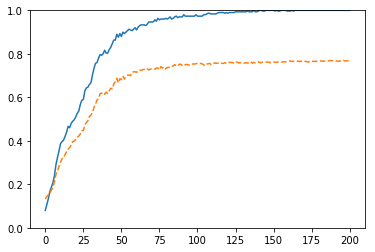

In [6]:
x = np.arange(max_epochs)
plt.plot(x, train_acc_list)
plt.plot(x, test_acc_list, linestyle = "--")
plt.ylim(0, 1.0)
plt.show()

### Dropout

In [7]:
class Dropout:
    def __init__(self, dropout_ratio = 0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
        
    def forward(self, x, train_flg = True):
        if train_flg:
            self.mask = np.random.rand( * x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)
        
    def backward(self, dout):
        return dout * self.mask